I am going to work on calfornia house price prediction dataset to predict the median value of a house within a block based on the given data

The description of the dataset used is :

1.Longitude: A measure of how far west a house is.

2.Latitude: A measure of how far north a  house is.

3.housingMedianAge: Median age of a house within a block where a lower number is a newer building.

4.totalRooms: Total number of rooms within a block.

5.totalBedrooms: Total number of bedrooms within a block

6.population: Total number of people residing within a block

7.households: Total number of households, a group of people residing within a
  home unit, for a block

8.medianIncome: Median income for households within a block of houses (measured
  in tens of thousands of US Dollars)

9.medianHouseValue: Median house value for households within a block (measured
  in US Dollars). Median House value is better than other averages as it is not influenced by extreme values.

10.oceanProximity: Location of the house w.r.t ocean/sea










Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Handling missing values

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<ipython-input-9-c432a5aab434>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['total_bedrooms'], color = 'green')


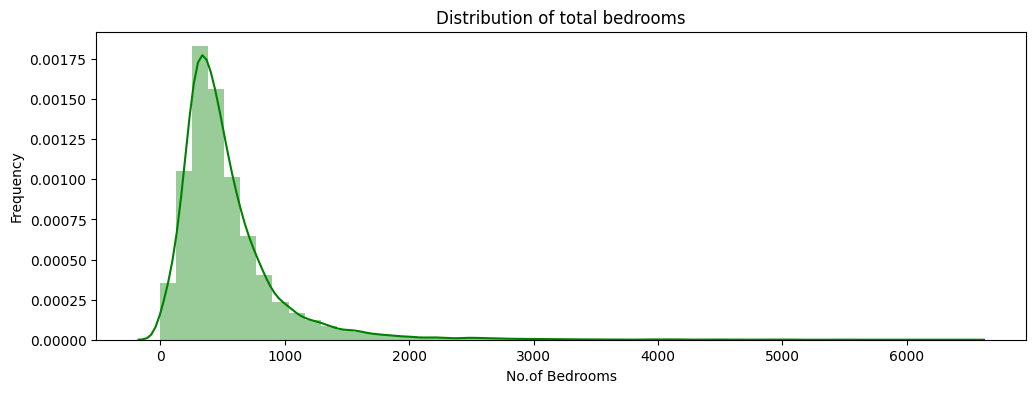

In [ ]:
plt.figure(figsize = (12,4))
sns.distplot(x = df['total_bedrooms'], color = 'green')
plt.title('Distribution of total bedrooms')
plt.xlabel('No.of Bedrooms')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

plotting a heatmap to find correlation between features

<ipython-input-12-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

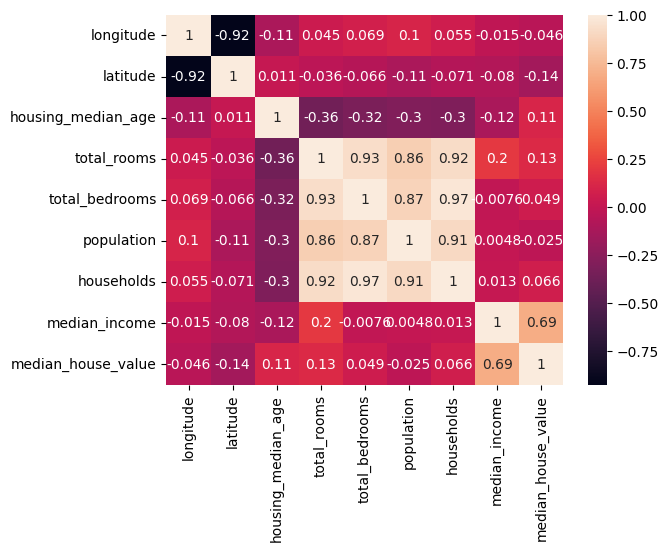

In [ ]:
sns.heatmap(df.corr(),annot=True)

plotting boxplot to check if outliers are present

<Axes: >

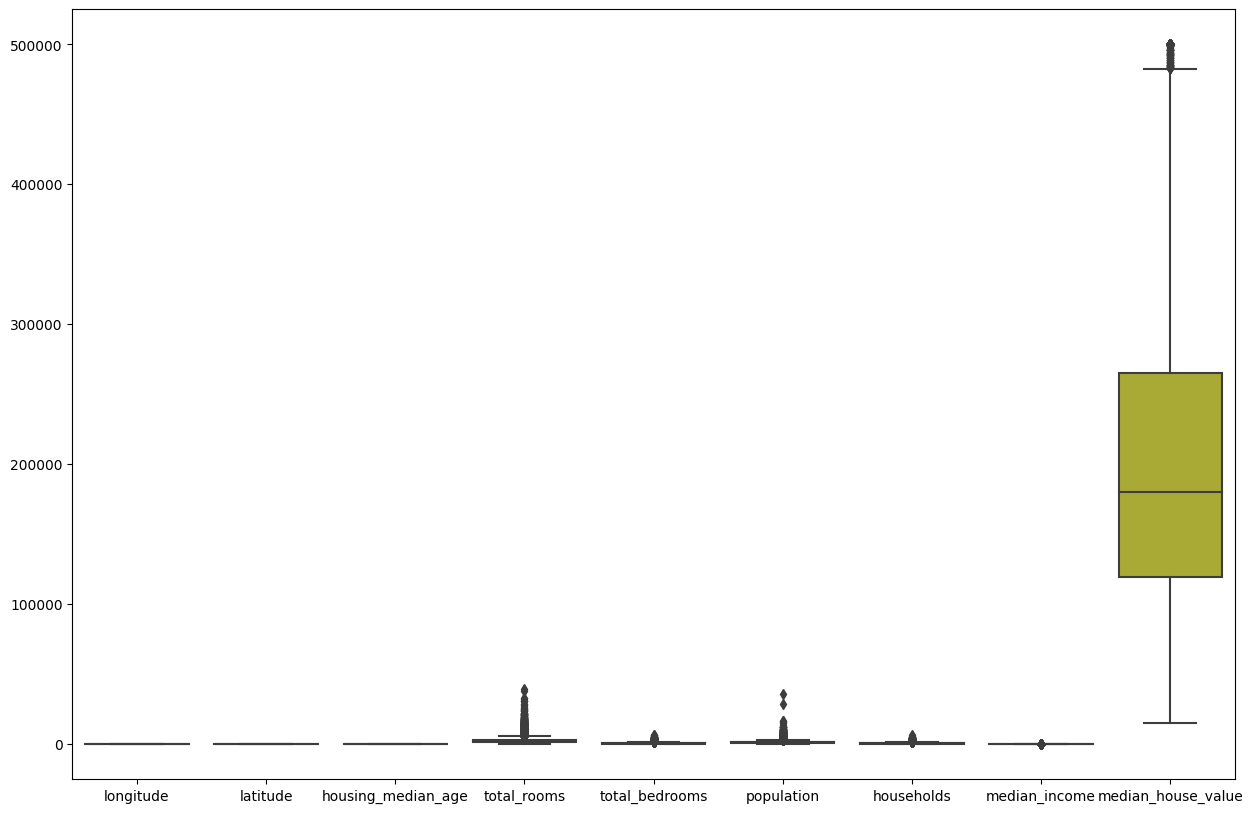

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

<Axes: >

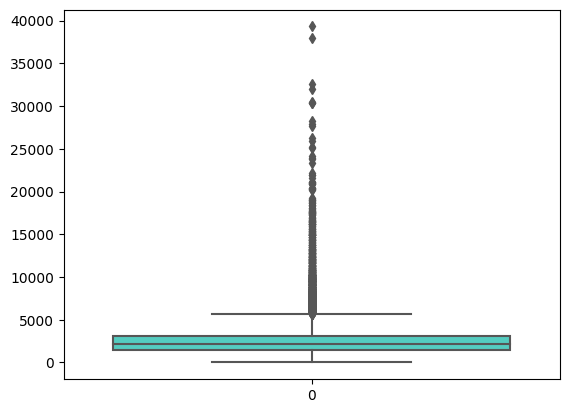

In [ ]:
sns.boxplot(df['total_rooms'],color='turquoise')

<Axes: >

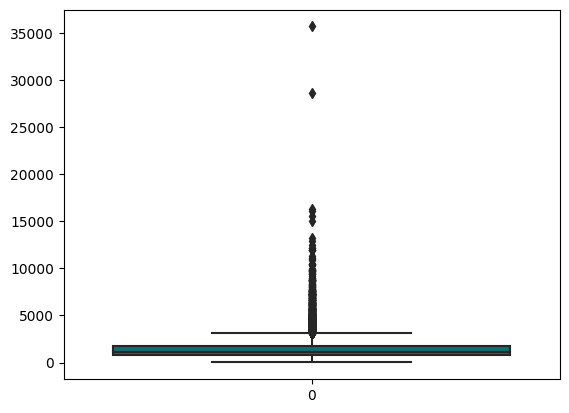

In [ ]:
sns.boxplot(df['population'],color='teal')

IQR test for removing outliers

In [ ]:
def IQR(df,x):
    q1 = df[x].quantile(0.25)
    q2 = df[x].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
  qa  min_limit = q1 - (1.5 * IQR)
    df_skew_new = pd.DataFrame(np.where(df[x] > max_limit, max_limit, (np.where(df[x] < min_limit, min_limit, df[x]))), columns=[x])
    df=df_skew_new[x]
    return df
df['total_rooms']=IQR(df,'total_rooms')
df['population']=IQR(df,'population')
df['total_bedrooms']=IQR(df,'total_bedrooms')
df['households']=IQR(df,'households')
df['median_income']=IQR(df,'median_income')
df['median_house_value']=IQR(df,'median_house_value')

<Axes: >

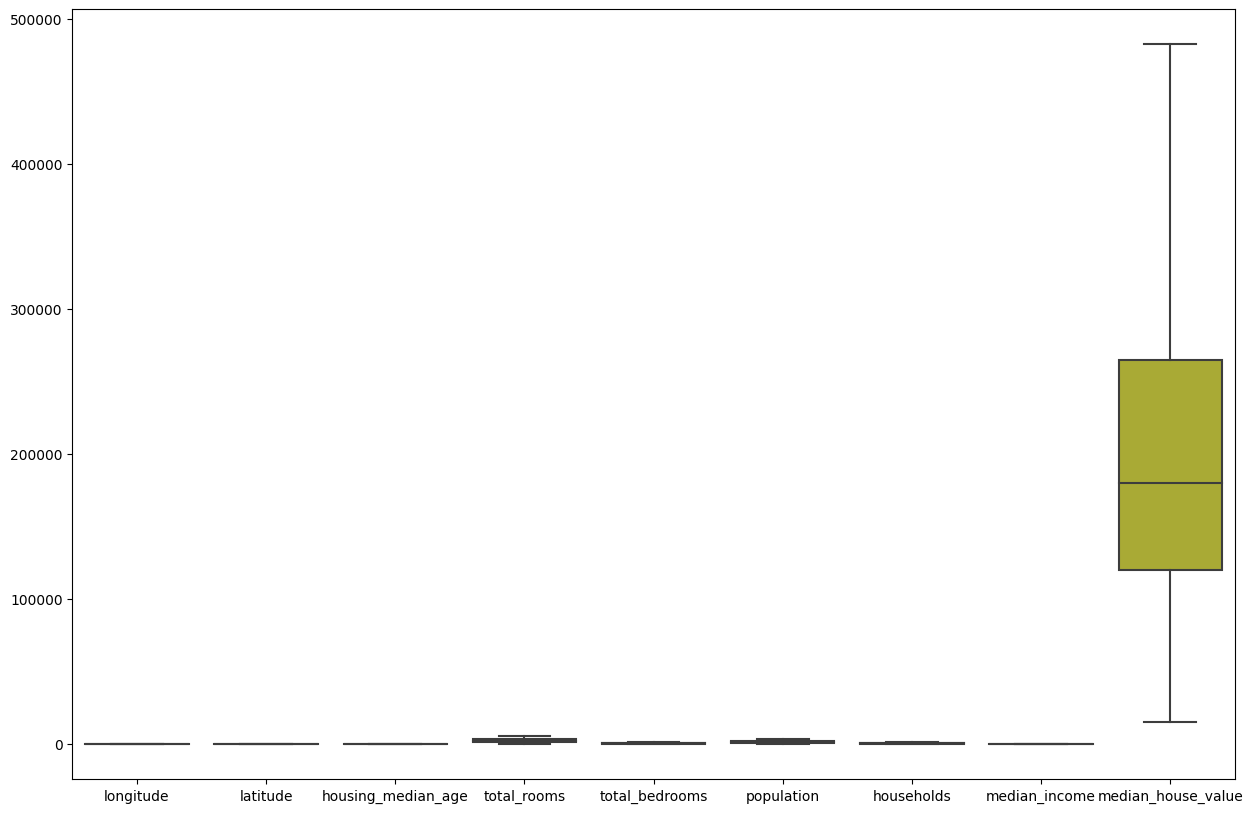

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

<Axes: >

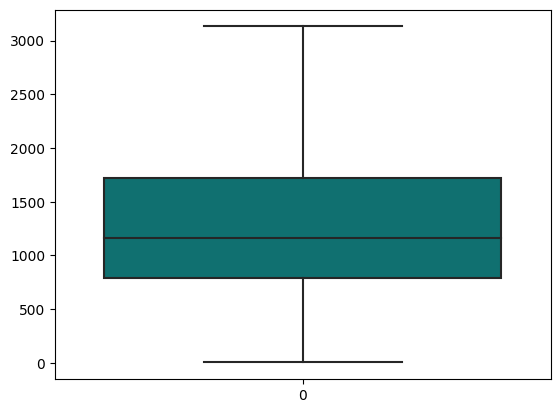

In [ ]:
sns.boxplot(df['population'],color='teal')

<Axes: >

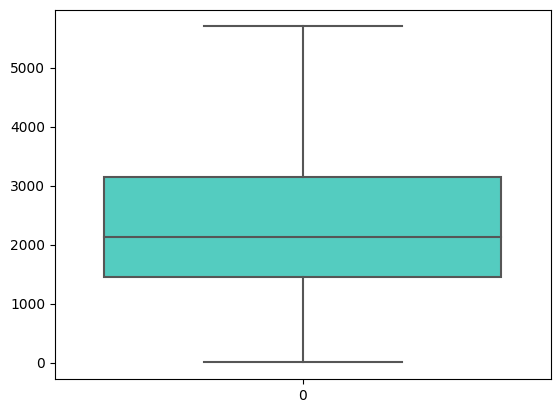

In [ ]:
sns.boxplot(df['total_rooms'],color='turquoise')

plotting barplot to compare population w.r.t ocean proximity

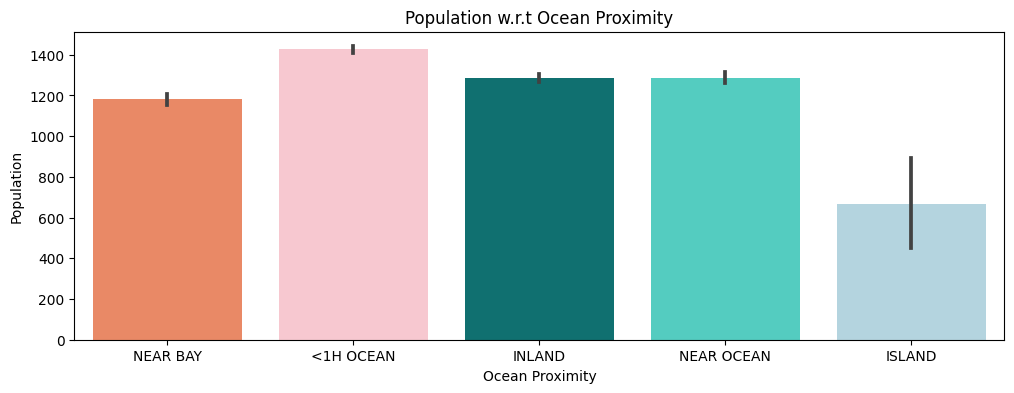

In [ ]:
plt.figure(figsize = (12,4))
color = ['coral','pink','teal','turquoise','lightblue']
sns.barplot(x = 'ocean_proximity', y = 'population', data = df, palette=color)
pl was a t.title('Population w.r.t Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Population')
plt.show()

<Axes: xlabel='ocean_proximity', ylabel='count'>

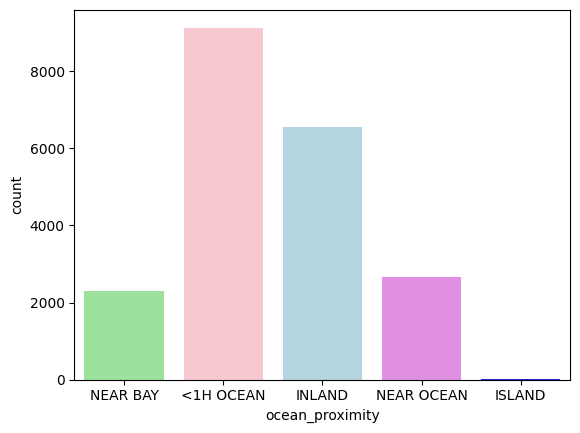

In [ ]:
color=['lightgreen','pink','lightblue','violet','blue']
sns.countplot(x='ocean_proximity',data=df,palette=color)

<Axes: xlabel='longitude', ylabel='latitude'>

<Figure size 1000x700 with 0 Axes>

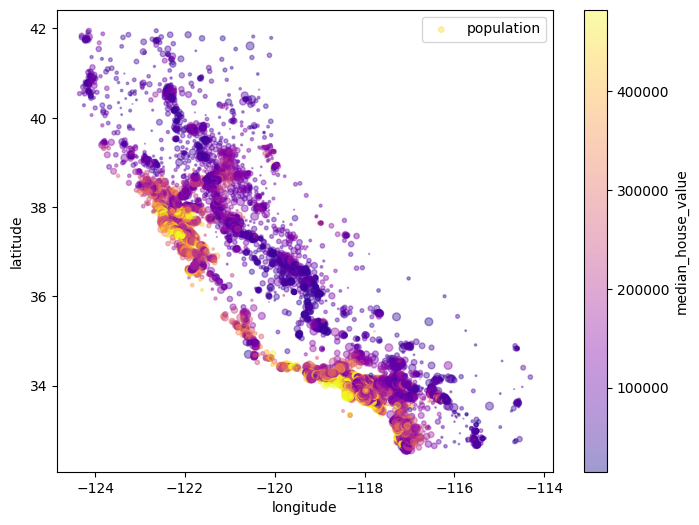

In [ ]:
plt.figure(figsize=(10,7))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=df["population"]/100, label="population", figsize=(8,6),
        c="median_house_value", cmap='plasma',colorbar=True,
    )

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
enc_df=pd.DataFrame(encoder.fit_transform(df[['ocean_proximity']]).toarray())
enc_df.rename(columns = {0:'ocean',1:'inland',2:'near_ocean',3:'near_bay',4:'island'},inplace=True)
enc_df

,ocean,inland,near_ocean,near_bay,island
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [ ]:
dft=pd.concat([df,enc_df],axis=1)
dft

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean,inland,near_ocean,near_bay,island
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000,374.0,845.0,330.0,1.560300,78100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.000,150.0,356.0,114.0,2.556800,77100.0,INLAND,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.000,485.0,1007.0,433.0,1.700000,92300.0,INLAND,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.000,409.0,741.0,349.0,1.867200,84700.0,INLAND,0.0,1.0,0.0,0.0,0.0


In [ ]:
dft=dft.drop(['ocean_proximity'],axis=1)
dft

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean,inland,near_ocean,near_bay,island
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000,374.0,845.0,330.0,1.560300,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.000,150.0,356.0,114.0,2.556800,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.000,485.0,1007.0,433.0,1.700000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.000,409.0,741.0,349.0,1.867200,84700.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
dft['longitude']=dft['longitude'].apply(lambda x:x*(-1))
dft

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean,inland,near_ocean,near_bay,island
0,122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,0.0,0.0,0.0,1.0,0.0
1,122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,0.0,0.0,0.0,1.0,0.0
2,122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,0.0,0.0,0.0,1.0,0.0
3,122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,0.0,0.0,0.0,1.0,0.0
4,122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,121.09,39.48,25.0,1665.000,374.0,845.0,330.0,1.560300,78100.0,0.0,1.0,0.0,0.0,0.0
20636,121.21,39.49,18.0,697.000,150.0,356.0,114.0,2.556800,77100.0,0.0,1.0,0.0,0.0,0.0
20637,121.22,39.43,17.0,2254.000,485.0,1007.0,433.0,1.700000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,121.32,39.43,18.0,1860.000,409.0,741.0,349.0,1.867200,84700.0,0.0,1.0,0.0,0.0,0.0


Feature selection using chi2 test

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2
x=dft.drop(['median_house_value'],axis=1)
y=dft[['median_house_value']].astype(int)
chi=SelectKBest(chi2,k=13)
best=chi.fit_transform(x,y)
best.shape

(20640, 13)

In [ ]:
x_nm=chi.get_support(indices=True)
print(dft.columns[x_nm])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean', 'inland', 'near_ocean', 'near_bay'],
      dtype='object')


Splitting train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(best,y, test_size=0.30, random_state=5)

Model Creation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_percentage_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('r2_score:',r2_score(y_pred_lr,y_test))
print('MAEP:',mean_absolute_percentage_error(y_pred_lr,y_test))
lr.get_params()

r2_score: 0.4988411003904567
MAEP: 0.36775829027977736


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
dec.fit(x_train,y_train)
y_pred_dec=dec.predict(x_test)
print('r2_score:',r2_score(y_pred_dec,y_test))
print('MAEP:',mean_absolute_percentage_error(y_pred_dec,y_test))

r2_score: 0.6623863009388511
MAEP: 0.2294591590301877


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('r2_score:',r2_score(y_pred_rf,y_test))
print('MAEP:',mean_absolute_percentage_error(y_pred_rf,y_test))

<ipython-input-32-1e8f4ae27c99>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


r2_score: 0.7783571668271667
MAEP: 0.16089275735169523


Hyper Parameter Tuning using GridsearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def best_model_selection(best,y):
    models = {'LR': {'model' : LinearRegression(), 'params' : {'copy_X': [True,False],
                                                               'fit_intercept': [True,False],
                                                               'n_jobs': [None,1,5,7,6],
                                                               'positive':[True, False]}},
              'DTR' : {'model' : DecisionTreeRegressor(),'params' : {'max_depth': [None, 5, 10, 15, 20, 25],
                                                                     'min_samples_split': [2, 5, 10, 20],
                                                                     'min_samples_leaf': [1, 2, 4, 6, 8],
                                                                     'max_features': ['auto', 'sqrt', 'log2']}},
              'RFR' : {'model': RandomForestRegressor(),'params' : {'n_estimators': [10, 20, 30, 40, 50, 60]}}
              }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=5)
    for model_name, config in models.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(best,y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model_selection(x_train,y_train)


,model,best_score,best_params
0,LR,0.665012,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,DTR,0.730415,"{'max_depth': 15, 'max_features': 'auto', 'min..."
2,RFR,0.808859,{'n_estimators': 60}


In [ ]:
lr1=LinearRegression(fit_intercept=False)
dt1=DecisionTreeRegressor(max_depth= None,max_features= 'auto', min_samples_leaf= 8, min_samples_split= 20)
rf1=RandomForestRegressor(n_estimators=60)

In [ ]:
print('Linear_Regression')
lr1.fit(x_train,y_train)
y_pred_lr1=lr1.predict(x_test)
lr_r2=r2_score(y_pred_lr1,y_test)
print('r2_score:',lr_r2)
print('MAEP:',mean_absolute_percentage_error(y_pred_lr1,y_test))

Linear_Regression
r2_score: 0.49884110039047924
MAEP: 0.3677582902817856


In [ ]:
print('Decision Tree Regression')
dt1.fit(x_train,y_train)
y_pred_dt1=dt1.predict(x_test)
dt_r2=r2_score(y_pred_dt1,y_test)
print('r2_score:',dt_r2)
print('MAEP:',mean_absolute_percentage_error(y_pred_dt1,y_test))

Decision Tree Regression
r2_score: 0.7125313450469954
MAEP: 0.19602020708470785


In [ ]:
print('Random Forest Regression')
rf1.fit(x_train,y_train)
y_pred_rf1=rf1.predict(x_test)
rf_r2=r2_score(y_pred_rf1,y_test)
print('r2_score:',rf_r2)
print('MAEP:',mean_absolute_percentage_error(y_pred_rf1,y_test))

Random Forest Regression
r2_score: 0.7762257955564674
MAEP: 0.16181769005217136


Comparing r2_score of different models

Text(0.5, 1.0, 'R2_score of different models')

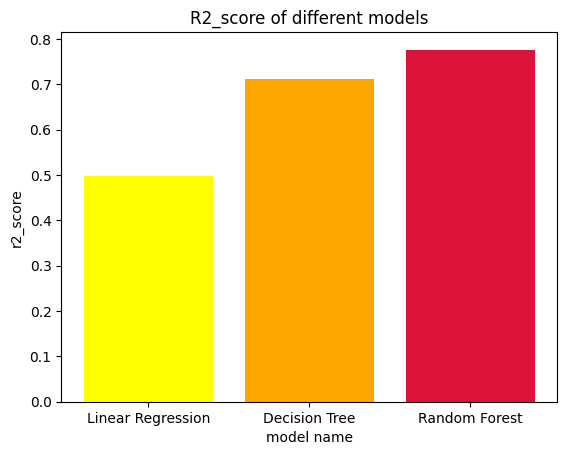

In [ ]:
model=['Linear Regression','Decision Tree','Random Forest']
r2=[lr_r2,dt_r2,rf_r2]
colors=['yellow','orange','crimson']
plt.bar(model,r2,color=colors)
plt.xlabel('model name')
plt.ylabel('r2_score')
plt.title('R2_score of different models')

Finally we can conclude that among the three models the highest r2_score is for random forest regressor and thus it can be considered as the best algorithm for creating the model for given dataset